In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Importing Data

In [3]:
yield_df = pd.read_csv('Data/yield.csv')
yield_df_df = pd.read_csv('Data/yield_df.csv')
temp_df = pd.read_csv('Data/temp.csv')
rainfall_df = pd.read_csv('Data/rainfall.csv')
pesticides_df = pd.read_csv('Data/pesticides.csv')

## Exploring & cleaning

In [4]:
yield_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [5]:
yield_df [yield_df['Area'] == 'Egypt'].head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
16860,QC,Crops,59,Egypt,5419,Yield,56,Maize,1961,1961,hg/ha,24014
16861,QC,Crops,59,Egypt,5419,Yield,56,Maize,1962,1962,hg/ha,26040
16862,QC,Crops,59,Egypt,5419,Yield,56,Maize,1963,1963,hg/ha,25824
16863,QC,Crops,59,Egypt,5419,Yield,56,Maize,1964,1964,hg/ha,27716
16864,QC,Crops,59,Egypt,5419,Yield,56,Maize,1965,1965,hg/ha,40703


In [6]:
cols = ['Area', 'Item', 'Year', 'Value']
yield_df = yield_df[cols]

In [7]:
yield_df.rename(columns={'Value':'Yield_value'}, inplace=True)

In [8]:
yield_df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Yams', 'Sweet potatoes', 'Plantains and others'],
      dtype=object)

In [9]:
temp_df.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [10]:
temp_df.rename(columns={'year':'Year', 'country':'Area'}, inplace=True)

In [11]:
temp_df.shape

(71311, 3)

In [12]:
rainfall_df.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [13]:
rainfall_df.rename(columns={' Area':'Area', 'average_rain_fall_mm_per_year':'avg_rain'}, inplace=True)

In [14]:
temp_df.shape

(71311, 3)

In [15]:
pesticides_df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [16]:
cols = ['Area','Year','Value']
pesticides_df = pesticides_df[cols]

In [17]:
pesticides_df.rename(columns={'Value':'Pesticide_value'}, inplace=True)

In [18]:
df = pd.merge(pd.merge(pd.merge(yield_df, temp_df, on=['Year', 'Area']), pesticides_df, on=['Year', 'Area']),rainfall_df, on=['Year', 'Area'])

In [19]:
df.head()

,Area,Item,Year,Yield_value,avg_temp,Pesticide_value,avg_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485
1,Albania,Potatoes,1990,66667,16.37,121.0,1485
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485
3,Albania,Sorghum,1990,12500,16.37,121.0,1485
4,Albania,Soybeans,1990,7000,16.37,121.0,1485


In [20]:
df.duplicated().sum()

2310

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(25938, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25938 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             25938 non-null  object 
 1   Item             25938 non-null  object 
 2   Year             25938 non-null  int64  
 3   Yield_value      25938 non-null  int64  
 4   avg_temp         25938 non-null  float64
 5   Pesticide_value  25938 non-null  float64
 6   avg_rain         25938 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [24]:
df[df['avg_rain'] == '..']

,Area,Item,Year,Yield_value,avg_temp,Pesticide_value,avg_rain
1986,Bahamas,Cassava,1990,106667,25.74,484.59,..
1987,Bahamas,Maize,1990,15000,25.74,484.59,..
1988,Bahamas,Sweet potatoes,1990,38118,25.74,484.59,..
1989,Bahamas,Cassava,1991,100000,25.66,484.59,..
1990,Bahamas,Maize,1991,16667,25.66,484.59,..
1991,Bahamas,Sweet potatoes,1991,31385,25.66,484.59,..


In [25]:
df["avg_rain"] = pd.to_numeric(df["avg_rain"], errors='coerce')

In [26]:
df.isnull().sum()

Area               0
Item               0
Year               0
Yield_value        0
avg_temp           0
Pesticide_value    0
avg_rain           6
dtype: int64

In [27]:
df.ffill(inplace=True)

In [28]:
df.to_csv('data.csv', index=False)

## Some Info

In [29]:
df.describe()

,Year,Yield_value,avg_temp,Pesticide_value,avg_rain
count,25938.000000,25938.000000,25938.000000,25938.000000,25938.000000
mean,2001.553898,76972.194464,20.423471,34774.639402,1146.674801
std,7.057115,84640.656247,6.439157,57224.325730,717.387069
min,1990.000000,50.000000,1.300000,0.040000,51.000000
25%,1995.000000,19996.000000,16.580000,1597.000000,593.000000
50%,2001.000000,39530.000000,21.420000,15373.000000,1083.000000
75%,2008.000000,104168.000000,26.060000,45620.000000,1668.000000
max,2013.000000,501412.000000,30.650000,367778.000000,3240.000000


In [30]:
print(df.Area.nunique())
print(df.Item.nunique())

101
10


In [31]:
df.head()

,Area,Item,Year,Yield_value,avg_temp,Pesticide_value,avg_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485.0
1,Albania,Potatoes,1990,66667,16.37,121.0,1485.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485.0
3,Albania,Sorghum,1990,12500,16.37,121.0,1485.0
4,Albania,Soybeans,1990,7000,16.37,121.0,1485.0


In [32]:
df.shape

(25938, 7)

In [33]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3826
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2595
Cassava                 1891
Yams                     774
Plantains and others     556
Name: count, dtype: int64

In [34]:
corr = df[['Year', 'Yield_value', 'avg_temp', 'Pesticide_value',
       'avg_rain']].corr()['Yield_value'].sort_values(ascending=False)

corr

Yield_value        1.000000
Year               0.091407
Pesticide_value    0.065560
avg_rain          -0.003998
avg_temp          -0.110445
Name: Yield_value, dtype: float64

## Encoding

In [35]:
countries_df = pd.get_dummies(df.Area).astype(int)
item_df = pd.get_dummies(df.Item).astype(int)
ohe = pd.merge(countries_df, item_df, left_index=True, right_index=True)
df = pd.merge(df, ohe, left_index=True, right_index=True)
df.drop(columns=['Area', 'Item'], axis=1, inplace=True)

In [36]:
# label_encoder = LabelEncoder()
# df['Area'] = label_encoder.fit_transform(df['Area'])
# encoded_values = label_encoder.classes_
# for original_label, encoded_value in zip(df['Area'].unique(), encoded_values):
#     print(f"Original Label: {original_label}, Encoded Value: {encoded_value}")

In [37]:
# df['Item'] = label_encoder.fit_transform(df['Item'])
# encoded_values = label_encoder.classes_
# for original_label, encoded_value in zip(df['Item'].unique(), encoded_values):
#     print(f"Original Label: {original_label}, Encoded Value: {encoded_value}")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25938 entries, 0 to 28247
Columns: 116 entries, Year to Yams
dtypes: float64(3), int64(113)
memory usage: 24.2 MB


## Visualization

In [39]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.5)

# plt.show()

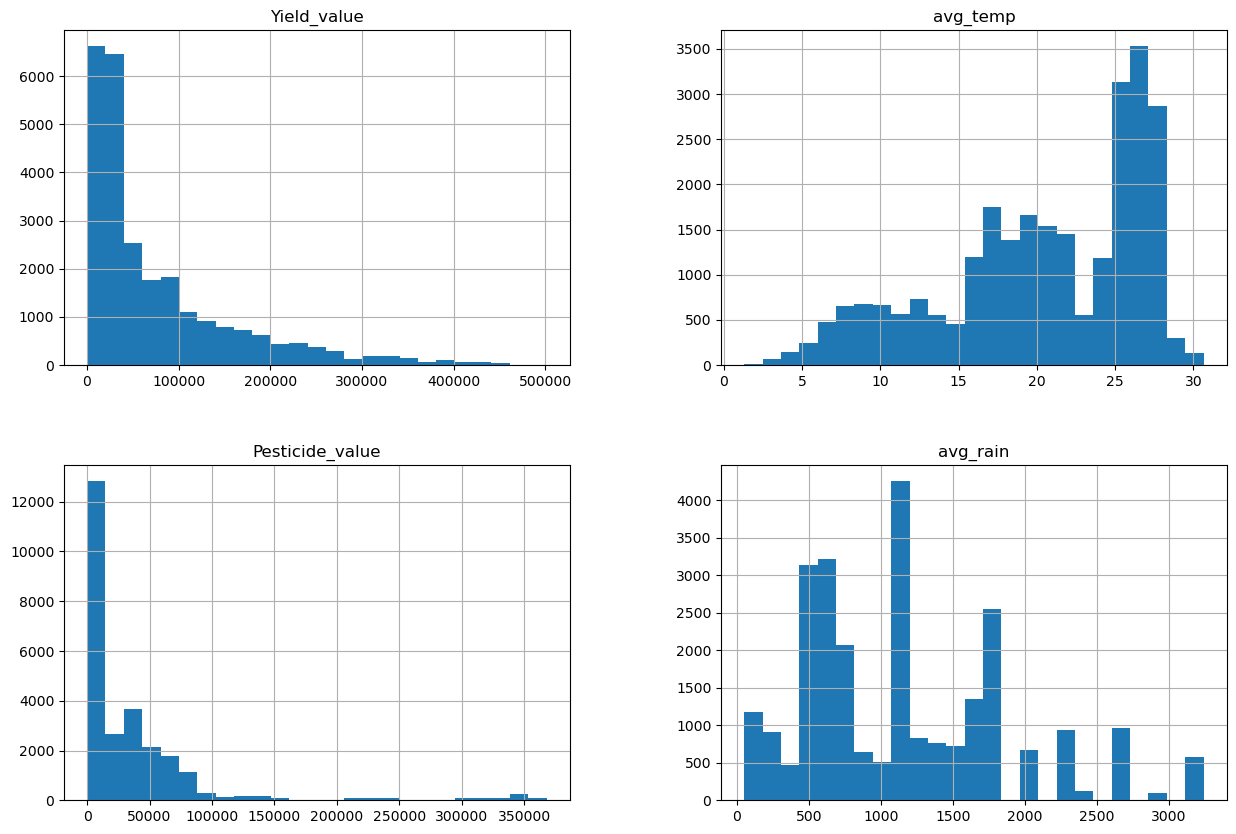

In [40]:
df[['Yield_value', 'avg_temp', 'Pesticide_value',
       'avg_rain']].hist(bins = 25,figsize=(15,10));

## Data Spliting

In [41]:
x = df.drop(['Yield_value'], axis=1)
y = df['Yield_value']

In [42]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [43]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)
eval_set = [(x_val, y_val)]

## Traing XGBoost Model

In [44]:
model = XGBRegressor(n_estimators=1000, eval_metric="rmse", alpha=0.01)

In [45]:
model.fit(x_train, y_train, eval_set=eval_set);

[0]	validation_0-rmse:84392.94108
[1]	validation_0-rmse:63324.02307
[2]	validation_0-rmse:50095.69077
[3]	validation_0-rmse:40615.01568
[4]	validation_0-rmse:35202.54287
[5]	validation_0-rmse:31739.14999
[6]	validation_0-rmse:29737.58822
[7]	validation_0-rmse:28274.46814
[8]	validation_0-rmse:27092.79831
[9]	validation_0-rmse:26294.70374
[10]	validation_0-rmse:25813.41978
[11]	validation_0-rmse:25102.80871
[12]	validation_0-rmse:24586.05913
[13]	validation_0-rmse:23749.18030
[14]	validation_0-rmse:23472.61018
[15]	validation_0-rmse:23327.65497
[16]	validation_0-rmse:22822.41287
[17]	validation_0-rmse:22686.08220
[18]	validation_0-rmse:22457.17824
[19]	validation_0-rmse:22380.19584
[20]	validation_0-rmse:22098.87276
[21]	validation_0-rmse:21802.70380
[22]	validation_0-rmse:21639.27892
[23]	validation_0-rmse:21517.00769
[24]	validation_0-rmse:21217.86852
[25]	validation_0-rmse:20835.15051
[26]	validation_0-rmse:20691.64603
[27]	validation_0-rmse:20431.83761
[28]	validation_0-rmse:20068.8

In [46]:
y_pred = model.predict(x_test)

## Evaluating XGBoost Model

In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 10154.5898


In [48]:
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {mae:.4f}")

RMSE: 4643.4814


In [49]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2*100:.2f}%")

R2 Score: 98.52%


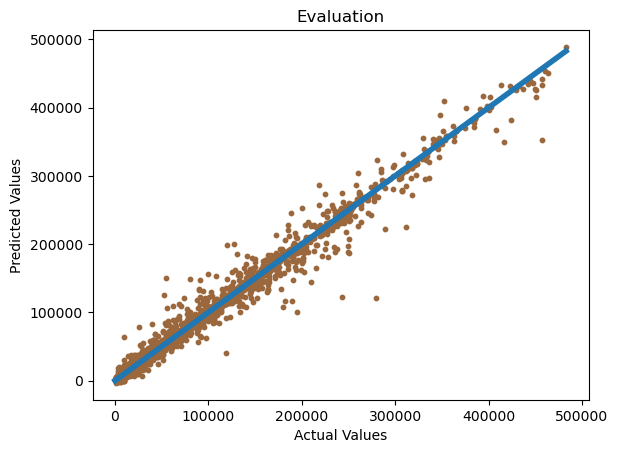

In [50]:
plt.scatter(y_test, y_pred,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Evaluation')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linewidth = 4)
plt.show()

## Traing Random Forest Model

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [52]:
model = RandomForestRegressor(n_estimators=200,max_depth=60)

In [53]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=60, n_estimators=200)

In [54]:
y_pred = model.predict(x_test)

## Evaluating Random Forest Model

In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 9857.2590


In [56]:
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {mae:.4f}")

RMSE: 4008.5615


In [57]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2*100:.2f}%")

R2 Score: 98.63%


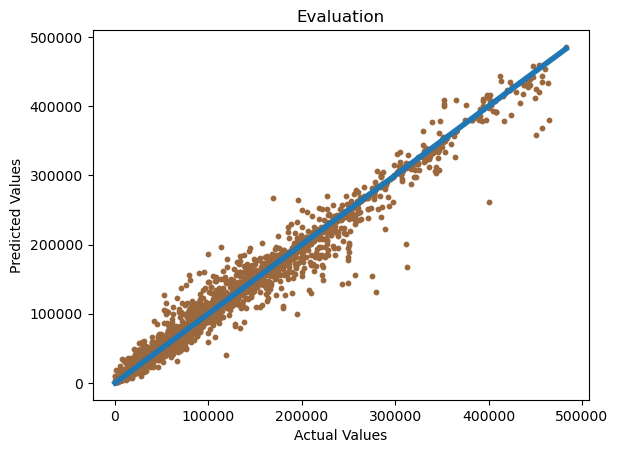

In [58]:
plt.scatter(y_test, y_pred,s=10,color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Evaluation')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linewidth = 4)
plt.show()